## <font color="blue">Projeto 3 - Ciência dos Dados</font>
** Lucas Fontenla e Guilherme Schoueri **
___
<h3>Proposta de projeto</h3>
<ul>
<li>Escolher dados de acordo com uma variável pré-estabelecida</li>
<li>Fazer um análise descritiva de dados escolhidos de acordo com um problema definido pelo grupo</li>
<li>Ajustar um modelo de regressão</li>
<li>Verificar e adequar a qualidade do ajuste</li>
</ul>

<h3>Situação Problema</h3>
<p>Em um determinado país, logo após uma revolução, um novo governo democrático assume o poder. Sua gestão, preocupada com a fertilidade no país, estabelece como um dos objetivos do mandato, diminuir o número de crianças nascidas por mulher. Para isso, se optarem por políticas que aumentem a média de tempo das mulheres na escola e diminuam o desemprego feminino, estariam adotando uma boa estratégia?</p> 

<h4>Variável Resposta</h4>
<ul>
<li>Fertilidade (Babies per women)</li>
</ul>

<h4>Variáveis Explicativas</h4>
<ul>
<li>Média de anos que as mulheres acima de 25 anos passaram na escola</li>
<li>Taxa de mulheres acima de 15 anos empregadas</li>
___

<h3>Parte 1 | Build do DataFrame</h3>
<p>Nesta seção segua a construção do dataframe</p>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

%matplotlib inline

In [17]:
data1 = pd.read_excel("indicator_undata_total_fertility.xlsx", index_col=0)
data2 = pd.read_excel("Years_in_school_women_25_plus.xlsx", index_col=0)
data3 = pd.read_excel("indicator_f_above_15_employ.xlsx", index_col=0)

In [18]:
data1 = data1.loc[:,2007]
data2 = data2.loc[:,2007]
data3 = data3.loc[:,2007]

In [19]:
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

In [20]:
paises = []
var1 = []
var2 = []
var3 = []

for i in data1.keys():
    if i in data2.keys():
        if i in data3.keys():
            paises.append(i)
            var1.append(data1.get(i))
            var2.append(data2.get(i))
            var3.append(data3.get(i))

d = {"Fertility": var1, "YearsSchool": var2, "Employ": var3}
df = pd.DataFrame(data=d, index=paises)
df

,Employ,Fertility,YearsSchool
Afghanistan,25.600000,6.46,0.3
Albania,42.099998,1.80,9.1
Algeria,31.700001,2.66,3.9
Angola,69.400002,6.52,2.6
Argentina,45.900002,2.25,9.9
Armenia,34.200001,1.40,11.1
Australia,54.599998,1.92,11.4
Austria,49.700001,1.38,10.8
Azerbaijan,56.200001,1.99,11.0
Bahamas,60.700001,1.88,10.6


<h3>Parte 2 | Análise dos Scatter Plots</h3>
<p>Abaixo, podemos observar que o scatter de Fertilidade (filhos por mulher) por Média de anos que as mulheres acima de 25 anos passaram na escola representa visualmente um coeficiente de correlação linear grande porém negativo. 
Já no segundo scatter, da Fertilidade (filhos por mulher) por Taxa de mulheres acima de 15 anos empregadas (%) representa um coeficiente de correlação linear praticamente nulo.</p>

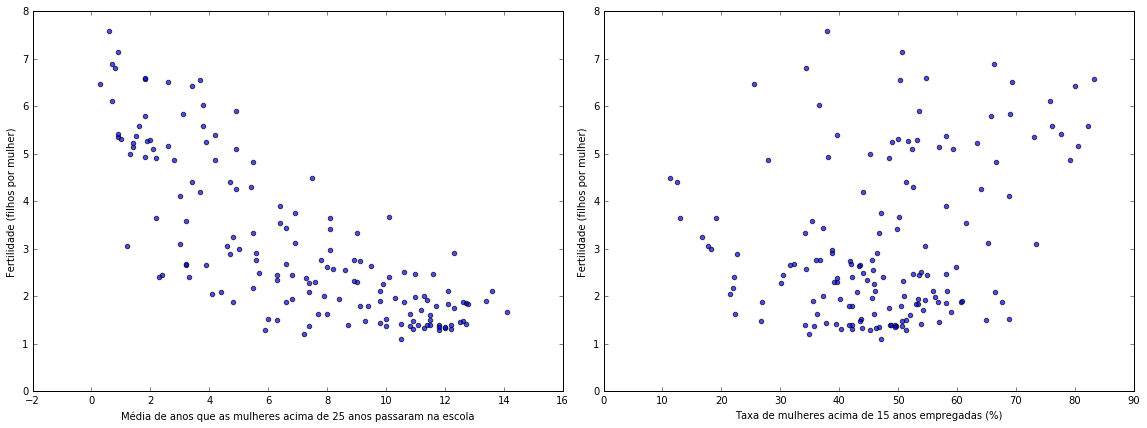

In [21]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.scatter(df.YearsSchool, df.Fertility, alpha=0.7)
ax1.set_xlabel("Média de anos que as mulheres acima de 25 anos passaram na escola")
ax1.set_ylabel("Fertilidade (filhos por mulher)")

ax2.scatter(df.Employ, df.Fertility, alpha=0.7)
ax2.set_xlabel("Taxa de mulheres acima de 15 anos empregadas (%)")
ax2.set_ylabel("Fertilidade (filhos por mulher)")


plt.tight_layout(1)

In [22]:
df.corr(method='pearson')

,Employ,Fertility,YearsSchool
Employ,1.000000,0.268604,-0.091101
Fertility,0.268604,1.000000,-0.789941
YearsSchool,-0.091101,-0.789941,1.000000


<p>A partir da tabela acima, podemos comprovar as observações dos gráficos acima. A variável "YearsSchool" em relação com a variável "Fertility", tem um coeficiente de correlação negativo e muito grande e, a variável "Employ" em relação com a variável "Fertility", tem um coeficiente de correlação próximo de zero.</p>

<h3>Parte 3 | Análise da regressão</p>

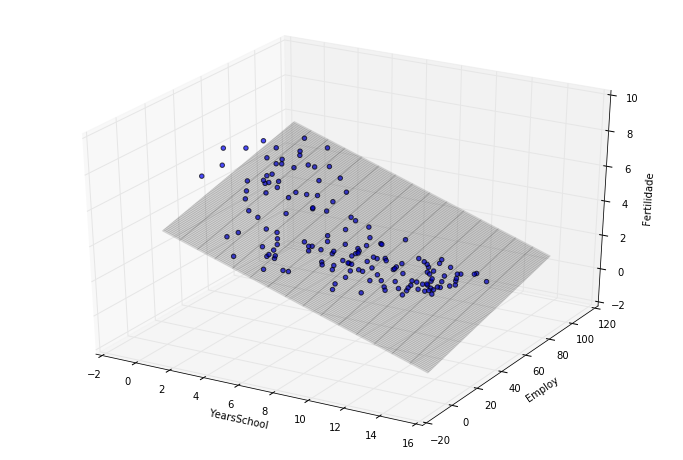

In [23]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='Fertility ~ YearsSchool + Employ', data = df)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 16, 1)                # generate a mesh
y_surf = np.arange(0, 100, 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'YearsSchool': x_surf.ravel(), 'Employ': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(df['YearsSchool'], df['Employ'], df['Fertility'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlabel('YearsSchool')
ax.set_ylabel('Employ')
ax.set_zlabel('Fertilidade')

In [24]:
#Montagem dos dados
y=df.Fertility
X=df.iloc[:,(0,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           7.31e-37
Time:                        16:04:03   Log-Likelihood:                -215.53
No. Observations:                 156   AIC:                             437.1
Df Residuals:                     153   BIC:                             446.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.3797      0.313     13.991      0.000         3.761     4.998
Employ          0.0224      0.005      4.207      0.000         0.012     0.033
YearsSchool    -0.3368      0.021    -16.378      0.000        -0.377    -0.296
==============================================================================
Omnibus:                        2.208   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.981
Skew:                          -0.067   Prob(JB):                        0.371
Kurtosis:                       3.536   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Análise dos Coeficientes</h4>
<h4>R²</h4>
<p>O coeficiente de determinação R² da regressão linear da regressão linear proposta, é de 66,3%, ou seja, 66,3% da variável resposta é explicada pelas variáveis explicativas selecionadas.</p>
<p>O coeficiente R² varia entre 0 e 1, portanto um valor de 0.663 (66,3%) é um valor razoável para considerar uma boa regressão linear>/p>

<h4>F-statistic</h4>
<p>Para análise do F-statistics determinamos duas hipóteses. A primeira hipótese é de que se todos os coeficientes de regressão forem nulos, nós conseguiremos ajustar mais precisamente os dados. A hipótese alternativa, portanto, nos diz que ao menos um dos coeficientes será não nulo. Portanto, adotando um nível de significância de 5%, se a probabilidade de F-statistics for menor que o p-value (igual a 5%) podemos rejeitar a hipótese nula, e desse modo, podemos inferir que temos um bom modelo de regressão.</p>
<p>Avaliando os valores recebidos, vemos que a probabilidade de F-statistics é na ordem de 10 elevado à -37, ou seja, é muito menor que os 5%, assim, podemos inferir que o modelo de regressão proposto acima é bom.</p>

<h4>Teste Omnibus</h4>
<p>Para iniciar a regressão, supomos que todos os erros seguem uma distribuição normal. Para que possamos afirmar que os erros se aproximam de uma distribuição normal, para isso, um valor perfeito é dois, sendo os extremos 0 e 4 ruins. </p>
<p>Analisando pela tabela vemos que o Omnibus é de 2.208, ou seja se aproxima muito de 2, assim, podemos afirmar que a aproximação dos erros à uma curva normal é razoável.</p>

<h4>Teste Durbin-Watson</h4>
<p>É um teste usado para analisar a autocorrelação entre duas observações adjacentes. O valor que indica uma grande autocorrelação entre ambos, é 2, sendo 0 e 4 os valores limites. Nota-se que o valor obtido no coeficiente Durbin-Watson é de 2.048, ou seja, há uma grande correlação entre as observações adjacentes.</p>

<h3>Conclusão</h3>
<p>No problema proposto, deveriamos aconselhar um novo governo democrático a como diminuir a fertilidade das mulheres, e pela regressão, como provamos que é um bom modelo, podemos inferir que se aumentarmos o tempo de permanência das mulheres na escola e a diminuição do desemprego podem influenciar sim na diminuição da fertilidade das mulheres.</p>